In [1]:
data ={'x':[1.,2.,3.,4.,5.], "y":[1.,3.,4.,6.,5.]}
df =pd.DataFrame(data)

In [2]:
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [4]:
import statsmodels.formula.api as smf 
lm_model = smf.ols(formula ="y~x", data=df).fit()

In [5]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

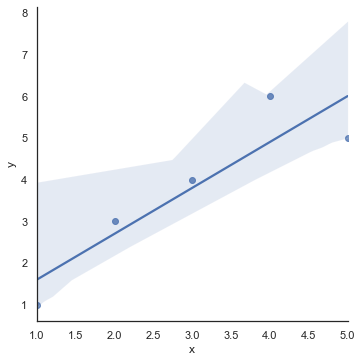

In [9]:
sns.lmplot(x='x', y='y', data=df)

In [12]:
resid =lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [13]:
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [16]:
mu = np.mean (df.y)
y=df.y
yhat=lm_model.predict()

In [17]:
np.sum((yhat - mu)**2/np.sum((y-mu)**2))

0.8175675675675673

In [20]:
lm_model.rsquared

0.8175675675675675

<AxesSubplot:ylabel='Density'>

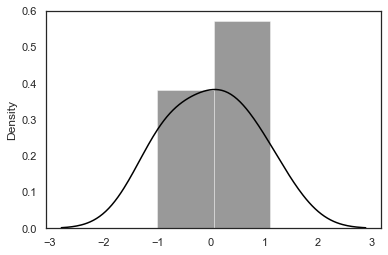

In [22]:
sns.distplot(resid,color='black')

In [30]:
data=pd.read_csv("data/ecommerce.csv")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [31]:
data.drop(['Email','Address','Avatar'],axis=1, inplace=True)
from sklearn.model_selection import train_test_split
X= data.drop("Yearly Amount Spent", axis=1)
y=data["Yearly Amount Spent"]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=13)

In [34]:
import statsmodels.api as sm
lm=sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.179e+04
Date:                 Tue, 02 Mar 2021   Prob (F-statistic):                        0.00
Time:                         16:20:52   Log-Likelihood:                         -1591.7
No. Observations:                  350   AIC:                                      3191.
Df Residuals:                      346   BIC:                                      3207.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8431      0.906     13.070      0.000      10.061      13.625
Time on App             35.2169      1.212     29.046      0.000      32.832      37.602
Time on Website        -14.2536      0.840    -16.960      0.000     -15.907     -12.601
Length of Membership    60.1702      1.275     47.183      0.000      57.662      62.678
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.755
Skew:                          -0.042   Prob(JB):                        0.686
Kurtosis:                       2.788   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
predictions=lm.predict(X_test)
predictions

0      535.773828
334    354.866191
33     464.637784
264    601.915599
428    569.022061
          ...    
119    555.080015
298    612.346688
392    550.756200
240    419.931837
469    445.807185
Length: 150, dtype: float64

In [38]:
y_test

0      587.951054
334    330.594446
33     491.073224
264    614.729638
428    556.298141
          ...    
119    571.307495
298    587.574799
392    549.131573
240    398.163469
469    427.356531
Name: Yearly Amount Spent, Length: 150, dtype: float64

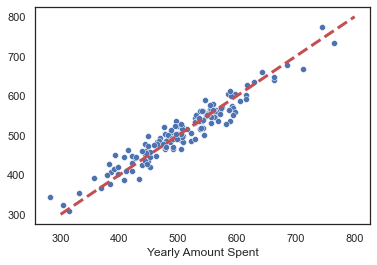

In [39]:
sns.scatterplot(y_test,predictions);
plt.plot([300,800],[300,800], 'r', ls='dashed',lw=3);

In [42]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MSE: 499.14356799900025
RMSE: 22.34152116573534
